Import Dependencies

In [91]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE
# ipython magic
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Data Loading
1. Given dataset $x \in \mathbb{R}^{28 \times 28}$, $y \in \mathbb{R}$
2. Flatten so $x' \in \mathbb{R}^{784}$ (x is vector)

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Original X_i shape: {x_train[0].shape}")
X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
print(f"Flattened X_i shape: {X.shape[1]}")

Original X_i shape: (28, 28)
Flattened X_i shape: 784


#### Create Dataframe
1. Load X,Y into df
2. Random sample $10\%$ of data. 
    - TSNE is $O(n^2)$ so this step is helpful for inital exploration. 


In [28]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
df = X
df['label'] = Y
df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)
df.shape

(6000, 785)

1. Init TSNE engine and perform data fitting.
2. Run TSNE fitting algorithm.
*Read more about TSNE [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)*

<img src="https://imgs.xkcd.com/comics/compiling.png" width="250px">

In [29]:
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(df.values)

/tmp/ipykernel_141278/2607691952.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


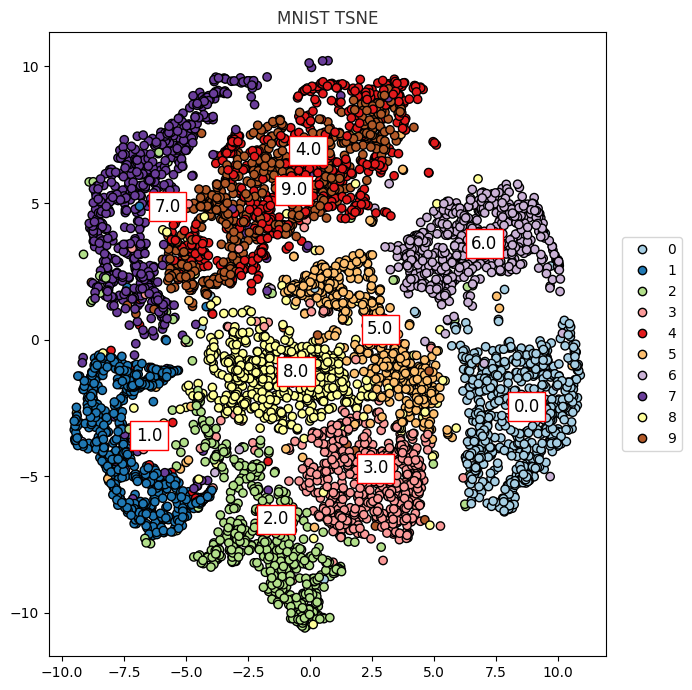

In [130]:
fig = plt.figure( figsize=(7,7) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
scatter = ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'], 
    cmap=plt.colormaps['Paired'], 
    alpha=1.0,
    edgecolor='black')


# Cluster labels
concatdf = pd.DataFrame(tsne_results, columns=['x', 'y'])
concatdf['label'] = df['label']
avgdf = concatdf.groupby('label').mean().reset_index()
avglabels = avgdf['label'].values
for i in range(len(avgdf)):
    cx,cy = avgdf.loc[i]['x'], avgdf.loc[i]['y']
    if i == 4: cy+=1
    tmptxt= ax.text(cx,cy, str(avgdf.loc[i]['label']), fontsize=12, color='black')
    tmptxt.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='red'))

# STYLING
t = ax.set_title("MNIST TSNE", alpha=.8, clip_on=False, y=1)
leg = ax.legend(*scatter.legend_elements(num=10), loc="right", bbox_to_anchor=(1.15, 0.5), )
for lh in leg.legendHandles: 
    lh.set_markeredgecolor('black')
plt.tight_layout()
plt.show()